#**Prakruti Chatbot**

#**Step: 01: Install All the Required Packages**

In [ ]:
!pip install langchain
!pip install pinecone-client
!pip install sentence_transformers
!pip install pdf2image
!pip install pypdf
!pip install xformers
!pip install bitsandbytes accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-p

#**Step 2: Import All the Required Libraries**

In [ ]:
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Pinecone
import pinecone
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import pipeline
import os
import sys

/usr/local/lib/python3.10/dist-packages/pinecone/index.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
from langchain import HuggingFacePipeline, PromptTemplate
from langchain.chains import RetrievalQA

#**Step 3: Load the PDF Files**

In [ ]:
!mkdir pdfs

#**Step 04: Extract the text from the PDF's**

In [ ]:
loader = PyPDFDirectoryLoader("pdfs")
data = loader.load()

In [ ]:
print(data)

[Document(page_content=' \nNM! ', metadata={'source': 'pdfs/KriyaSharirFinal.pdf', 'page': 0}), Document(page_content='Prof. Dr. Subhash Ranade was formerly  \nPrincipal of Ashtang Ayurveda College, Pune,  \nIndia and is the author of more than 92 books on  \nAyurveda, which have been published in  \nGerman, Polish, Italian, English, and many  \nIndian languages. He has the honour of being  \nvisiting Professor to all the colleges of Ayur -  \nveda in USA and other Institutes like Sewa \nAkademie in Germany,  \nAteneo Veda V yasa in Italy, Foundation of Health in Poland and  \nAyurveda International Diffusing Association of Japan. Since  \n1981, he has visited and has conducted hundreds of Ayurveda \ncourses for medical practitioners in Europe, \nU.S.A. and Japan.  \nDr. Rajendra Deshpande is an Ayurvedic  \nconsultant and Head of Department of  \nAyurvedic Physiology at Ayurvedic College,  \nNigdi, Pune. He has done double post  \ngraduation (MD) in the subjects of Ayurvedic  \nMedici

#**Step 05: Split the Extracted Data into Text Chunks**

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=20)

In [ ]:
docs = text_splitter.split_documents(data)

In [ ]:
print(len(docs))

969


In [ ]:
docs[3]

Document(page_content='given m any radio and television interviews on various topics of  \nAyurveda and has contributed many articles in various Journals.  \nHe has written many books on Ayurveda in \nMarathi, English and  \nGerman Languages. He has visited Switzerland, \nUSA, Germany,  \nItaly and Spain for A yurvedic propagation.  \nDr. Swati Chobhe is Associate Professor, \nPhysiology Department at Ayurveda college, Akurdi, Pune and has \nbeen teaching the subject since 1991. Dr. Chobhe is a member of', metadata={'source': 'pdfs/KriyaSharirFinal.pdf', 'page': 1})

In [ ]:
docs[4]

Document(page_content='International Academy of Ayurveda and has been teaching \nPhysiology to foreign students for the last 7 years. Dr. Chobhe \nhas also  \nauthored a book on Practical Sharira Kriya Vijnan in Marathi  \nlanguage which is well accepted by Ayurvedic Students.  \n CHAUKHAMBA SANSKRIT PRATISHTHAN  \nDELHI - 110007  \nPRICE : Rs. 175.00  \n  \n \n(According to the Syllabus of CCIM, New Delhi)  \nDr . Swati Chobhe', metadata={'source': 'pdfs/KriyaSharirFinal.pdf', 'page': 1})

#**Step 06: Downlaod the Embeddings From the Hugging Face**

In [ ]:
embeddings = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
query_result = embeddings.embed_query("Hello World")

In [ ]:
print("Length", len(query_result))

Length 384


#**Step 07: Initializing the Pinecone**

In [ ]:
PINECONE_API_KEY = os.environ.get('PINECONE_API_KEY', '8ab2ef74-c695-4e0f-b882-c3c83b2f62c1')
PINECONE_API_ENV = os.environ.get('PINECONE_API_ENV', 'gcp-starter')

In [ ]:
# initialize pinecone
pinecone.init(
    api_key=PINECONE_API_KEY,  # find at app.pinecone.io
    environment=PINECONE_API_ENV  # next to api key in console
)
index_name = "praks01" # put in the name of your pinecone index here


#**Step 08: Create Embeddings for each of the Text Chunk**

In [ ]:
docsearch=Pinecone.from_texts([t.page_content for t in docs], embeddings, index_name=index_name)


#If you already have an index, you can load it like this

In [ ]:
#docsearch = Pinecone.from_existing_index(index_name, embeddings)


#**Step 09: Similarity Search**

In [ ]:
query = "kapa?"

In [ ]:
docs = docsearch.similarity_search(query, k=4)

In [ ]:
docs

[Document(page_content='prakriti. Also it quenches the frequent thirst of Vata pra kriti.  \n2) Amla  182 Sharir Kriya Vijnan', metadata={}),
 Document(page_content='prakriti. Also it quenches the frequent thirst of Vata pra kriti.  \n2) Amla  182 Sharir Kriya Vijnan', metadata={}),
 Document(page_content='prakriti. Also it quenches the frequent thirst of Vata pra kriti.  \n2) Amla  182 Sharir Kriya Vijnan', metadata={}),
 Document(page_content='prakriti. Also it quenches the frequent thirst of Vata pra kriti.  \n2) Amla  182 Sharir Kriya Vijnan', metadata={})]

#**Step 10: Creating a Llama2 Model Wrapper**

In [ ]:
from huggingface_hub import notebook_login
import torch

In [ ]:
notebook_login()


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-chat-hf", use_auth_token=True)

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/tokenization_auto.py:640: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [ ]:
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-chat-hf",
                                             device_map='auto',
                                             torch_dtype=torch.float16,
                                             use_auth_token=True,
                                             load_in_8bit=True
                                             )

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:479: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:374: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [ ]:
pipe = pipeline("text-generation",
                model=model,
                tokenizer= tokenizer,
                torch_dtype=torch.bfloat16,
                device_map="auto",
                max_new_tokens = 512,
                do_sample=True,
                top_k=30,
                num_return_sequences=1,
                eos_token_id=tokenizer.eos_token_id
                )

In [ ]:
llm=HuggingFacePipeline(pipeline=pipe, model_kwargs={'temperature':0.1})


#**Step 11: Create a Prompt Template**

In [ ]:
SYSTEM_PROMPT = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer."""


In [ ]:
B_INST, E_INST = "[INST]", "[/INST]"
B_SYS, E_SYS = "<<SYS>>\n", "\n<</SYS>>\n\n"

In [ ]:
SYSTEM_PROMPT = B_SYS + SYSTEM_PROMPT + E_SYS

In [ ]:
instruction = """
{context}

Question: {question}
"""

In [ ]:
template = B_INST + SYSTEM_PROMPT + instruction + E_INST

In [ ]:
template

"[INST]<<SYS>>\nUse the following pieces of context to answer the question at the end.\nIf you don't know the answer, just say that you don't know, don't try to make up an answer.\n<</SYS>>\n\n\n{context}\n\nQuestion: {question}\n[/INST]"

In [ ]:
prompt = PromptTemplate(template=template, input_variables=["context", "question"])

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=docsearch.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

In [ ]:
result = qa_chain("predict my prakriti if my voice is broken, quick movements, hurried movements, poor eater, inconsistent intake, poor stability of joints, cracking movements, restless eyes, restless head and shoulder, talkative, highly irritable, poor stress tolerance, quick to like, forgets quickly, rough mouth, rough teeth and rough hair")

In [ ]:
result['result']

"  I cannot predict your prakriti based on the symptoms you have provided. Prakriti is a complex concept that involves a comprehensive analysis of an individual's constitution, including their physical and psychological characteristics, temperament, and habits. Based on the symptoms you have mentioned, I cannot accurately determine your prakriti.\nHowever, I can tell you that vitiated Prana can indeed cause various physical and mental symptoms, including those you have mentioned. For example, vitiated Prana can cause hiccups, bronchial asthma, and other respiratory problems, as well as problems with the head, throat, tongue, mouth, nose, chest, and joints. It can also affect an individual's mental and emotional state, leading to irritability, forgetfulness, and difficulty tolerating stress.\nIt is important to consult a qualified Ayurvedic practitioner for a comprehensive evaluation of your constitution and to determine the appropriate treatment. They will need to conduct a thorough ex

In [ ]:
while True:
    user_input=input(f"prompt:")
    if user_input=='exit':
        print('Exiting')
        sys.exit()
    if user_input=='':
        continue
    result=qa_chain({'query':user_input})
    print(f"Answer:{result['result']}")

Answer:  Based on the information provided, your Prakriti is Kapha. Here are some lifestyle recommendations tailored to your constitution:
As a Kapha individual, you are naturally inclined towards relaxation, comfort, and stability. Here are some lifestyle suggestions that can help you maintain balance and harmony in your life:
1. Diet: Kapha individuals should focus on light, easy-to-digest foods that are warm and dry in nature. Avoid heavy, oily, or spicy foods that can cause imbalance in your body. Include plenty of fruits, vegetables, whole grains, and lean proteins in your diet.
2. Exercise: Engage in light to moderate physical activities that are gentle on your body, such as yoga, meditation, or walking. Avoid strenuous exercise or any activity that can cause excessive sweating or strain.
3. Sleep: Kapha individuals tend to sleep a lot, but it's essential to establish a regular sleep schedule to maintain balance. Aim for 7-8 hours of sleep each night and try to wake up at the sam

Prakruti classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [ ]:
# Load data file
bank=pd.read_csv('data1.csv')
# Make a copy for parsing
question_data = bank.copy()
question_data['C'] = question_data['C'].map( {'Vata':0, 'Kapha':1,'Pitta':2} )
# Convert categorical variables to dummies
question_data_original=question_data
question_data_class=question_data['C']
question_data.drop('C', axis=1, inplace=True)
question_with_dummies = pd.get_dummies(data=question_data)

In [ ]:
# standardizing and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
P_scaled=scaler.fit_transform(question_with_dummies)
P_scaled=pd.DataFrame(P_scaled)
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(P_scaled)
print(P_pca.shape)

(147, 97)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix
X=P_pca
y=question_data_class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

[0.9111111111111111, 0.9555555555555555, 0.9333333333333332, 0.9111111111111111, 0.9111111111111111, 0.888888888888889, 0.9111111111111111, 0.9333333333333332, 0.9333333333333332, 0.888888888888889, 0.9111111111111111, 0.9333333333333332, 0.9111111111111111, 0.9111111111111111, 0.9555555555555555, 0.9555555555555555, 0.9111111111111111]


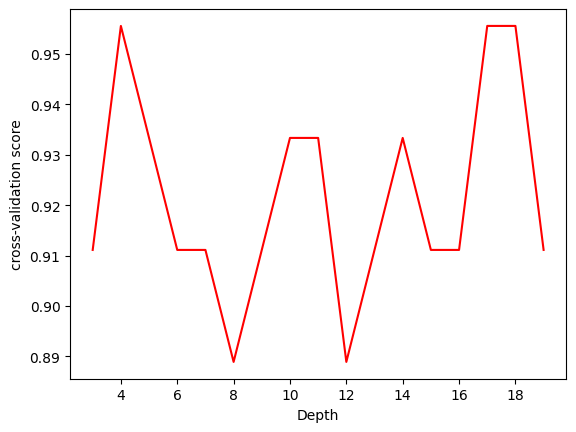

In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation
    scores = cross_val_score(estimator=clf, X=X_test, y=y_test, cv=5)
    depth.append(scores.mean())
print(depth)
n_range=list(range(3,20))

from matplotlib import pyplot as plt
plt.plot(n_range,depth,color="red")
plt.xlabel('Depth')
plt.ylabel('cross-validation score')
fig1 = plt.gcf()
plt.draw()
plt.show()
fig1.savefig('dt2_d.png',dpi=200)

In [ ]:
from sklearn import neighbors
depth=4
clf = clf = tree.DecisionTreeClassifier(max_depth=depth)
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)
## See how the model performs on the test data.
clf.score(X_test, y_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       1.00      0.93      0.96        14
           2       0.75      1.00      0.86         9

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.92        45
weighted avg       0.95      0.93      0.94        45



In [ ]:
clf.score(X_test, y_test)

0.9333333333333333

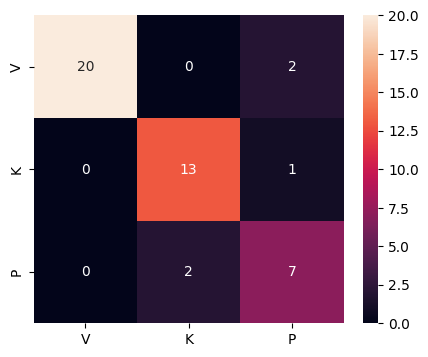

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = [i for i in "VKP"],
                  columns = [i for i in "VKP"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True)
fig1 = plt.gcf()
plt.draw()
plt.show()
fig1.savefig('dt3.png',dpi=200)

In [ ]:
X_test.shape

(45, 97)

In [ ]:
X.shape

(147, 97)